# Texas Energy Demand Forecasting


# Shareable Link to the Data

https://drive.google.com/drive/folders/1S0bTGJ5TvQ3HgSu6-2guRUEfxyCiAcRs?usp=sharing

# 1. Introduction

Electricity demand is impacted by a variety of factors. However, the need for power is becoming increasingly weather-dependent. Extreme weather will almost certainly have a detrimental influence on electric consumption. Power outages caused by specific weather phenomena are a significant detrimental influence of weather on electric utility operations. On the one hand, extreme weather such as cold snaps and heat waves increase demand for power, according to the analysis. Drought, on the other side, causes a decrease in hydropower and wind power output, decreasing the supply of electricity. This study focuses on weather factor analysis - how to anticipate power demand using weather. Temperature, humidity, and dew point are the most important meteorological variables. If the forecast error for power consumption is the same, the impact will be substantially bigger in the peak months of winter and summer than in other months. When the temperature is low, the demand for electricity rises as the temperature falls due to the need for heating; when the temperature is high, the demand for electricity rises as the temperature rises due to the need for cooling.

## Relative citations

1.This article shows the weather affects the power generation. And there are several important weather factors which have impact on the daily electric utility operations.<br>
**Link:https://sciencepolicy.colorado.edu/socasp/weather1/keener.html**<br>
2.Obviously weather can influence electricity usage, but in summer, there is also another important factor-humidity. Comparing the results of models that used only weather with those that added humidity, the models that added humidity were much more accurate.<br>
**Link:https://www.nature.com/articles/s41467-020-15393-8**<br>
3.This search shows the electricity usage is affected by season. In the summer and winter, the temperature is higher or lower, so people use more than other seasons.<br>
**Link:https://www.epa.gov/climate-indicators/climate-change-indicators-residential-energy-use**<br>
4.The weather impact both the supply and demand of electricity. And this influence is growing. Although the costs of wind and solar power are decreasing, their their output variability is also a probelm.  <br>
**Link:https://www.sciencedirect.com/science/article/pii/S0360544217320844**<br>
5.There are some math models to analyze the relationship between extreme temperature and electricity demand.The result is the electricity consumption (EC) and mean monthly maximum temperature are increasing with the passage of time.
**Link:https://link.springer.com/article/10.1186/2251-6832-4-36**<br>
6.This shows the process of DL/ML used in weather prediction. And also show how they work. Although this is a useful method to analyze weather, this is also in the initial step now. So there are more research is needed.<br>
**Link:https://royalsocietypublishing.org/doi/10.1098/rsta.2020.0097**



# 2. Reading the demand and weather data
Make sure you subset your data to be between 2011 and 2019 - you will use data from 2020 to test your final models!

In [ ]:
# standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# RNN-specific modules
import pandas as pd
import numpy as npa
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense, SimpleRNN, LSTM, Dropout, Bidirectional, Conv1D, MaxPool1D, GRU
from tensorflow.keras.callbacks import EarlyStopping

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Demand Data

Read the demand data.

In [ ]:
# https://drive.google.com/file/d/1M7-XiHcfboUzKZ-tmflDomy_IuRAvnw9/view?usp=sharing
!gdown --id 1M7-XiHcfboUzKZ-tmflDomy_IuRAvnw9

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1M7-XiHcfboUzKZ-tmflDomy_IuRAvnw9
To: /content/Ercot_2011_2021_feb.csv
100% 3.52M/3.52M [00:00<00:00, 158MB/s]


In [ ]:
energy = pd.read_csv('Ercot_2011_2021_feb.csv') # it just downloaded locally to your workspace!
energy.info()
energy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97848 entries, 0 to 97847
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  97848 non-null  int64  
 1   Date        97848 non-null  object 
 2   HE          97848 non-null  int64  
 3   MWh         97847 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ MB


Unnamed: 0        Date  HE           MWh
0           0  2010-01-01   1  32094.064435
1           1  2010-01-01   2  32171.322546
2           2  2010-01-01   3  32241.752463
3           3  2010-01-01   4  32459.193227
4           4  2010-01-01   5  33123.751047

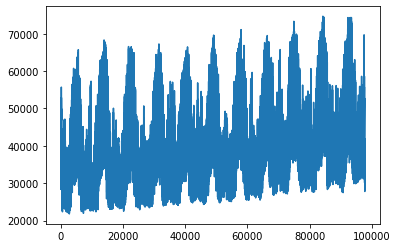

In [ ]:
# this is your target variable
energy['MWh'].plot()

Pretty cool!- It looks like energy varies between 20K and 70K megawatts.

In [ ]:
print(energy['Date'].min())
print(energy['Date'].max())

2010-01-01
2021-03-01


In [ ]:
energy['Date'] = pd.to_datetime(energy['Date'])

In [ ]:
print(energy.loc[(energy['Date'] == '2011-01-01') & (energy['HE'] == 0)].index)
print(energy.loc[(energy['Date'] == '2020-12-31') & (energy['HE'] == 23)].index)

Int64Index([8759], dtype='int64')
Int64Index([96430], dtype='int64')


### Subsetting data from 2011 - 2020

In [ ]:
energy = energy.loc[8759:96430, :]
energy.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
energy.info()
energy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87672 entries, 8759 to 96430
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    87672 non-null  datetime64[ns]
 1   HE      87672 non-null  int64         
 2   MWh     87671 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.0 MB


Date  HE           MWh
8759 2011-01-01   0  28496.388850
8760 2011-01-01   1  27662.443480
8761 2011-01-01   2  27250.044715
8762 2011-01-01   3  26783.226081
8763 2011-01-01   4  26676.468490

In [ ]:
energy[energy['MWh'].isnull()].index

# Since we had one missing value, we replaced it with the previous value
energy['MWh'][51288] = energy['MWh'][51287]

In [ ]:
energy.set_index(['Date', 'HE'], inplace=True, drop=True)
energy.shape

(87672, 1)

# Fort-Stockton Weather Data

Read the weather data.

In [ ]:
# https://drive.google.com/file/d/1vl2RKquLYS1QRyYE7ySIj24jPnXFp2od/view?usp=sharing
!gdown --id 1vl2RKquLYS1QRyYE7ySIj24jPnXFp2od

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1vl2RKquLYS1QRyYE7ySIj24jPnXFp2od
To: /content/FST.csv
100% 97.2M/97.2M [00:00<00:00, 260MB/s]


In [ ]:
weather = pd.read_csv('FST.csv')
weather.info()
# weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581124 entries, 0 to 581123
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   station            581124 non-null  object
 1   valid              581124 non-null  object
 2   tmpf               581124 non-null  object
 3   dwpf               581124 non-null  object
 4   relh               581124 non-null  object
 5   drct               581124 non-null  object
 6   sknt               581124 non-null  object
 7   p01i               581124 non-null  object
 8   alti               581124 non-null  object
 9   mslp               581124 non-null  object
 10  vsby               581124 non-null  object
 11  gust               581124 non-null  object
 12  skyc1              581124 non-null  object
 13  skyc2              581124 non-null  object
 14  skyc3              581124 non-null  object
 15  skyc4              581124 non-null  object
 16  skyl1              5

In [ ]:
# convert time stamp to datetime for interpolation
weather['valid'] = pd.to_datetime(weather['valid'])

In [ ]:
# look at the datetime range
print(weather['valid'].min())
print(weather['valid'].max())

2010-01-01 00:53:00
2021-02-19 23:55:00


In [ ]:
# set the datetime as the index so you can do interpolation later
weather.set_index(weather['valid'], inplace=True)
weather.head()

station               valid   tmpf   dwpf   relh    drct  \
valid                                                                          
2010-01-01 00:53:00     FST 2010-01-01 00:53:00  30.02  24.98  81.27  180.00   
2010-01-01 01:53:00     FST 2010-01-01 01:53:00  28.04  24.08  84.87  190.00   
2010-01-01 02:53:00     FST 2010-01-01 02:53:00  26.96  23.00  84.80  220.00   
2010-01-01 03:53:00     FST 2010-01-01 03:53:00  26.96  23.00  84.80  210.00   
2010-01-01 04:53:00     FST 2010-01-01 04:53:00  28.04  23.00  81.11  220.00   

                      sknt p01i   alti     mslp  ... skyl4 wxcodes  \
valid                                            ...                 
2010-01-01 00:53:00   5.00    M  30.50  1031.80  ...     M       M   
2010-01-01 01:53:00   5.00    M  30.49  1031.30  ...     M       M   
2010-01-01 02:53:00   9.00    M  30.47  1030.90  ...     M       M   
2010-01-01 03:53:00   8.00    M  30.46  1030.40  ...     M       M   
2010-01-01 04:53:00  12.00    M  30.44  1030.00  ...     M       M   

                    ice_accretion_1hr ice_accretion_3hr ice_accretion_6hr  \
valid                                                                       
2010-01-01 00:53:00                 M                 M                 M   
2010-01-01 01:53:00                 M                 M                 M   
2010-01-01 02:53:00                 M                 M                 M   
2010-01-01 03:53:00                 M                 M                 M   
2010-01-01 04:53:00                 M                 M                 M   

                    peak_wind_gust peak_wind_drct peak_wind_time   feel  \
valid                                                                     
2010-01-01 00:53:00              M              M              M  24.04   
2010-01-01 01:53:00              M              M              M  21.69   
2010-01-01 02:53:00              M              M              M  17.25   
2010-01-01 03:53:00              M              M              M  17.90   
2010-01-01 04:53:00              M              M              M  16.96   

                                                                 metar  
valid                                                                   
2010-01-01 00:53:00  METAR KFST 010553Z AUTO 18005KT 10SM CLR M01/M...  
2010-01-01 01:53:00  METAR KFST 010653Z AUTO 19005KT 10SM CLR M02/M...  
2010-01-01 02:53:00  METAR KFST 010753Z AUTO 22009KT 10SM CLR M03/M...  
2010-01-01 03:53:00  METAR KFST 010853Z AUTO 21008KT 10SM CLR M03/M...  
2010-01-01 04:53:00  METAR KFST 010953Z AUTO 22012KT 10SM CLR M02/M...  

[5 rows x 29 columns]

You are welcome to use all fields if you would like (not recommended), but I recommend you focus on:
* tmpf
*	dwpf
*	relh

Since these are the three variables that determine who turns on their heat or airconditioner. You should coerce these three variables to numeric (the missing values are currently coded as 'M'), which is why the data type is object right now.

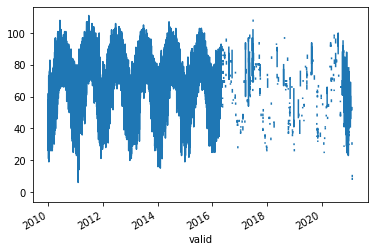

In [ ]:
weather['tmpf'] = pd.to_numeric(weather['tmpf'], errors='coerce')
weather['tmpf'].plot()

In [ ]:
# Replace missing values represented as 'M' with nan
weather.replace('M', np.nan, inplace=True)

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 581124 entries, 2010-01-01 00:53:00 to 2021-02-19 23:55:00
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   station            581124 non-null  object        
 1   valid              581124 non-null  datetime64[ns]
 2   tmpf               107334 non-null  float64       
 3   dwpf               107288 non-null  object        
 4   relh               106558 non-null  object        
 5   drct               567128 non-null  object        
 6   sknt               573647 non-null  object        
 7   p01i               94765 non-null   object        
 8   alti               464695 non-null  object        
 9   mslp               95785 non-null   object        
 10  vsby               579833 non-null  object        
 11  gust               51652 non-null   object        
 12  skyc1              578508 non-null  object        
 13  skyc2     

In [ ]:
# Eliminate rows before 2011 by getting its index and then keeping only from 2011
weather = weather.loc['2011-01-01 00:53:00':'2020-12-31 23:53:00', :]

In [ ]:
# Make sure the data starts with 2011 and ends with 2020
print(weather.iloc[0,1])
print(weather.iloc[-1,1])

2011-01-01 00:53:00
2020-12-31 23:53:00


### Keeping selected variables for resampling weather data

In [ ]:
weather = weather[['tmpf', 'dwpf', 'relh']].astype(float)

In [ ]:
weather_resampled = weather.resample('1H').max()
weather_resampled = weather_resampled.fillna(method='ffill')

In [ ]:
weather_resampled.info()
weather_resampled.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87672 entries, 2011-01-01 00:00:00 to 2020-12-31 23:00:00
Freq: H
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpf    87672 non-null  float64
 1   dwpf    87672 non-null  float64
 2   relh    87672 non-null  float64
dtypes: float64(3)
memory usage: 2.7 MB


tmpf   dwpf   relh
valid                                   
2011-01-01 00:00:00  32.00  17.96  55.72
2011-01-01 01:00:00  33.08  19.04  55.89
2011-01-01 02:00:00  33.08  17.96  53.36
2011-01-01 03:00:00  32.00  19.04  58.37
2011-01-01 04:00:00  30.02  19.04  63.24

In [ ]:
weather_resampled['Date'] = weather_resampled.index
weather_resampled.head()

tmpf   dwpf   relh                Date
valid                                                       
2011-01-01 00:00:00  32.00  17.96  55.72 2011-01-01 00:00:00
2011-01-01 01:00:00  33.08  19.04  55.89 2011-01-01 01:00:00
2011-01-01 02:00:00  33.08  17.96  53.36 2011-01-01 02:00:00
2011-01-01 03:00:00  32.00  19.04  58.37 2011-01-01 03:00:00
2011-01-01 04:00:00  30.02  19.04  63.24 2011-01-01 04:00:00

Based on the Date's we have (valid), we are using the lambda funtion to extract the month, day, hour, and weekday from it. This will provide us additional information on the consumption later in our analysis.

In [ ]:
weather_resampled['month'] = weather_resampled['Date'].apply(lambda time: time.month)
weather_resampled['day'] = weather_resampled['Date'].apply(lambda time: time.day)
weather_resampled['hour'] = weather_resampled['Date'].apply(lambda time: time.hour)
weather_resampled['weekday'] = weather_resampled['Date'].apply(lambda time: time.weekday())

## Data Transfromation | Feature Engineering - Weather Dataset

Based on the months we calaculated we decided to calaculate seasons based on that. The seasons are as follows:

Spring = 0 (Initially defined - months 3,4, and 5)

Summer = 1 (Months between 6 and 8)

Fall = 2 (Months between 9 and 12)

Winter = 3 (Months 1 and 2- because peak winter)

In [ ]:
# Seasons
weather_resampled['seasons'] = 0

# Spring = 0

for i in range(len(weather_resampled)):
  if weather_resampled['month'][i] >= 6 and weather_resampled['month'][i] <= 8: 
    weather_resampled['seasons'][i] = 1     # Summer
  elif weather_resampled['month'][i] >= 9 and weather_resampled['month'][i] <= 12:
    weather_resampled['seasons'][i] = 2     # Fall
  elif weather_resampled['month'][i] >= 1 and weather_resampled['month'][i] <= 2:
    weather_resampled['seasons'][i] = 3     # Winter
  else:
    None

# weather_resampled.head()

Here we have defined weekends based on weekdays that we have calculated below. Additionally we also calculated office hours which span between 8am and 5pm.

In [ ]:
# Weekend vs. Weekday
weather_resampled['weekend'] = np.where(weather_resampled['weekday'] > 5, 1, 0)

In [ ]:
# Office hours
weather_resampled['office_hours'] = 0

for i in range(len(weather_resampled)):
  if weather_resampled['hour'][i] > 8 and weather_resampled['hour'][i] < 18:
    weather_resampled['office_hours'][i] = 1
  else:
    None

In [ ]:
# Dividing the day in sections - morning, afternoon, evening, night
weather_resampled['day_sections'] = 0
 # 0 is for night
 
for i in range(len(weather_resampled)):
  if weather_resampled['hour'][i] > 4 and weather_resampled['hour'][i] < 13:
    weather_resampled['day_sections'][i] = 1    # morning
  elif weather_resampled['hour'][i] > 12 and weather_resampled['hour'][i] < 17:
    weather_resampled['day_sections'][i] = 2    # afternoon
  elif weather_resampled['hour'][i] > 16 and weather_resampled['hour'][i] < 22:
    weather_resampled['day_sections'][i] = 3    # evening
  else:
    None


In [ ]:
# weather_resampled.reset_index(inplace=True, drop=True)
weather_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87672 entries, 2011-01-01 00:00:00 to 2020-12-31 23:00:00
Freq: H
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   tmpf          87672 non-null  float64       
 1   dwpf          87672 non-null  float64       
 2   relh          87672 non-null  float64       
 3   Date          87672 non-null  datetime64[ns]
 4   month         87672 non-null  int64         
 5   day           87672 non-null  int64         
 6   hour          87672 non-null  int64         
 7   weekday       87672 non-null  int64         
 8   seasons       87672 non-null  int64         
 9   weekend       87672 non-null  int64         
 10  office_hours  87672 non-null  int64         
 11  day_sections  87672 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 8.7 MB


Below we have calculated the rolling averages per 3, 6, 12, 24 and 48 hours

In [ ]:
weather_resampled['3hr_rolling_tmpf'] = weather_resampled['tmpf'].rolling(3).mean()
weather_resampled['6hr_rolling_tmpf'] = weather_resampled['tmpf'].rolling(6).mean()
weather_resampled['12hr_rolling_tmpf'] = weather_resampled['tmpf'].rolling(12).mean()
weather_resampled['24hr_rolling_tmpf'] = weather_resampled['tmpf'].rolling(24).mean()
weather_resampled['48hr_rolling_tmpf'] = weather_resampled['tmpf'].rolling(48).mean()

weather_resampled['3hr_rolling_dwpf'] = weather_resampled['dwpf'].rolling(3).mean()
weather_resampled['6hr_rolling_dwpf'] = weather_resampled['dwpf'].rolling(6).mean()
weather_resampled['12hr_rolling_dwpf'] = weather_resampled['dwpf'].rolling(12).mean()
weather_resampled['24hr_rolling_dwpf'] = weather_resampled['dwpf'].rolling(24).mean()
weather_resampled['48hr_rolling_dwpf'] = weather_resampled['dwpf'].rolling(48).mean()

Here, we have performed feature engineering and created 3 new variables from the clean dataset.

First, we calaculated m_tmpf which is the product of month and tmpf. This is done to get the peak value in certain months.

Secondly, we calculated m_tmpf2 which is the product month and tmpf sqaured. This is done because when we square a large number it becomes even larger and our model wasnt able to predict the highs very well. So this varibale would be very important in capturing that information.

In [ ]:
weather_resampled['m_tmpf'] = weather_resampled['month']*weather_resampled['tmpf']
weather_resampled['m_tmpf2'] = weather_resampled['month']*np.power(weather_resampled['tmpf'],2)

Lastly, we calculated tmpf*dwpf which is the product of tmpf and dwpf. This is done since tempearature and dew point are highly correlated and we wanted to see if the interaction variable will help forecast better.

We have followed the same process for GYI Weather dataset which is for the city of Sherman in Texas.

In [ ]:
weather_resampled['tmpf*dwpf'] = weather_resampled['tmpf']*weather_resampled['dwpf']

We have imported the holidays module to diffrentiate between public holidays and normal days.

In [ ]:
# Public Holidays

# importing holidays module
import holidays

# getting holidays in the US
US_holidays = holidays.UnitedStates(state = 'TX')

weather_resampled['public_holiday'] = 0

for i in range(len(weather_resampled)):
  if weather_resampled['Date'][i] in US_holidays:
    weather_resampled['public_holiday'][i] = 1
  else:
    None

weather_resampled['public_holiday'].value_counts()

0    82656
1     5016
Name: public_holiday, dtype: int64

In [ ]:
weather_resampled.shape

(87672, 26)

# 3. Sherman/Denison City Weather Data

The city of Sherman is more towards the north of Texas while Stockton id more towards south. We wanted to include another city's temperature so that it is more generalized for the satte of Texas since it is a large state. ANd seems like, that did help our model perform better.

In [ ]:
gyi = pd.read_csv('/content/drive/Shareddrives/Deep Learning/Project 2 - RNN/Data/GYI.csv')
gyi.head()

station             valid      lon      lat  elevation   tmpf   dwpf   relh  \
0     GYI  2010-01-01 00:05 -96.6737  33.7141      228.0  30.70  26.40  83.85   
1     GYI  2010-01-01 00:25 -96.6737  33.7141      228.0  30.20  25.90  83.82   
2     GYI  2010-01-01 00:45 -96.6737  33.7141      228.0  30.20  25.50  82.44   
3     GYI  2010-01-01 01:05 -96.6737  33.7141      228.0  29.70  24.80  81.72   
4     GYI  2010-01-01 01:25 -96.6737  33.7141      228.0  29.10  24.80  83.74   

     drct   sknt  ... wxcodes ice_accretion_1hr ice_accretion_3hr  \
0  340.00  10.00  ...       M                 M                 M   
1  350.00  10.00  ...       M                 M                 M   
2  340.00   8.00  ...       M                 M                 M   
3  350.00   6.00  ...       M                 M                 M   
4  350.00   6.00  ...       M                 M                 M   

  ice_accretion_6hr peak_wind_gust peak_wind_drct peak_wind_time   feel  \
0                 M              M              M              M  21.34   
1                 M              M              M              M  20.71   
2                 M              M              M              M  21.90   
3                 M              M              M              M  22.76   
4                 M              M              M              M  22.04   

                                               metar snowdepth  
0  KGYI 010505Z AUTO 34010KT 10SM CLR M01/M03 A30...         M  
1  KGYI 010525Z AUTO 35010KT 10SM CLR M01/M03 A30...         M  
2  KGYI 010545Z AUTO 34008KT 10SM CLR M01/M04 A30...         M  
3  KGYI 010605Z AUTO 35006KT 10SM CLR M01/M04 A30...         M  
4  KGYI 010625Z AUTO 35006KT 10SM CLR M02/M04 A30...         M  

[5 rows x 33 columns]

In [ ]:
gyi.shape

(277036, 33)

In [ ]:
# convert time stamp to datetime for interpolation
gyi['valid'] = pd.to_datetime(gyi['valid'])

In [ ]:
# look at the datetime range
print(gyi['valid'].min())
print(gyi['valid'].max())

2010-01-01 00:05:00
2021-12-31 23:55:00


In [ ]:
# set the datetime as the index so you can do interpolation later
gyi.set_index(gyi['valid'], inplace=True)
gyi.head()

station               valid      lon      lat  elevation  \
valid                                                                          
2010-01-01 00:05:00     GYI 2010-01-01 00:05:00 -96.6737  33.7141      228.0   
2010-01-01 00:25:00     GYI 2010-01-01 00:25:00 -96.6737  33.7141      228.0   
2010-01-01 00:45:00     GYI 2010-01-01 00:45:00 -96.6737  33.7141      228.0   
2010-01-01 01:05:00     GYI 2010-01-01 01:05:00 -96.6737  33.7141      228.0   
2010-01-01 01:25:00     GYI 2010-01-01 01:25:00 -96.6737  33.7141      228.0   

                      tmpf   dwpf   relh    drct   sknt  ... wxcodes  \
valid                                                    ...           
2010-01-01 00:05:00  30.70  26.40  83.85  340.00  10.00  ...       M   
2010-01-01 00:25:00  30.20  25.90  83.82  350.00  10.00  ...       M   
2010-01-01 00:45:00  30.20  25.50  82.44  340.00   8.00  ...       M   
2010-01-01 01:05:00  29.70  24.80  81.72  350.00   6.00  ...       M   
2010-01-01 01:25:00  29.10  24.80  83.74  350.00   6.00  ...       M   

                    ice_accretion_1hr ice_accretion_3hr ice_accretion_6hr  \
valid                                                                       
2010-01-01 00:05:00                 M                 M                 M   
2010-01-01 00:25:00                 M                 M                 M   
2010-01-01 00:45:00                 M                 M                 M   
2010-01-01 01:05:00                 M                 M                 M   
2010-01-01 01:25:00                 M                 M                 M   

                    peak_wind_gust peak_wind_drct peak_wind_time   feel  \
valid                                                                     
2010-01-01 00:05:00              M              M              M  21.34   
2010-01-01 00:25:00              M              M              M  20.71   
2010-01-01 00:45:00              M              M              M  21.90   
2010-01-01 01:05:00              M              M              M  22.76   
2010-01-01 01:25:00              M              M              M  22.04   

                                                                 metar  \
valid                                                                    
2010-01-01 00:05:00  KGYI 010505Z AUTO 34010KT 10SM CLR M01/M03 A30...   
2010-01-01 00:25:00  KGYI 010525Z AUTO 35010KT 10SM CLR M01/M03 A30...   
2010-01-01 00:45:00  KGYI 010545Z AUTO 34008KT 10SM CLR M01/M04 A30...   
2010-01-01 01:05:00  KGYI 010605Z AUTO 35006KT 10SM CLR M01/M04 A30...   
2010-01-01 01:25:00  KGYI 010625Z AUTO 35006KT 10SM CLR M02/M04 A30...   

                    snowdepth  
valid                          
2010-01-01 00:05:00         M  
2010-01-01 00:25:00         M  
2010-01-01 00:45:00         M  
2010-01-01 01:05:00         M  
2010-01-01 01:25:00         M  

[5 rows x 33 columns]

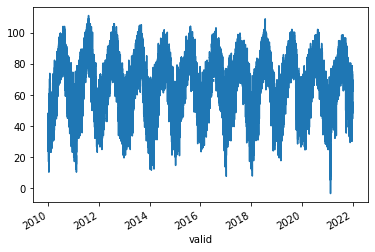

In [ ]:
gyi['tmpf'] = pd.to_numeric(gyi['tmpf'], errors='coerce')
gyi['tmpf'].plot()

In [ ]:
# Replace missing values represented as 'M' with nan
gyi.replace('M', np.nan, inplace=True)

In [ ]:
gyi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 277036 entries, 2010-01-01 00:05:00 to 2021-12-31 23:55:00
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   station            277036 non-null  object        
 1   valid              277036 non-null  datetime64[ns]
 2   lon                277036 non-null  float64       
 3   lat                277036 non-null  float64       
 4   elevation          277036 non-null  float64       
 5   tmpf               275918 non-null  float64       
 6   dwpf               275921 non-null  object        
 7   relh               274472 non-null  object        
 8   drct               275795 non-null  object        
 9   sknt               275834 non-null  object        
 10  p01i               232643 non-null  object        
 11  alti               276892 non-null  object        
 12  mslp               0 non-null       float64       
 13  vsby      

In [ ]:
# Eliminate rows before 2011 by getting its index and then keeping only from 2011
gyi = gyi.loc['2011-01-01 00:05:00':'2020-12-31 23:55:00', :]

In [ ]:
# Make sure the data starts with 2011 and ends with 2020
print(gyi.iloc[0,1])
print(gyi.iloc[-1,1])

2011-01-01 00:05:00
2020-12-31 23:55:00


In [ ]:
gyi = gyi[['tmpf', 'dwpf', 'relh']].astype(float)

In [ ]:
gyi_resampled = gyi.resample('1H').max()
gyi_resampled = gyi_resampled.fillna(method='ffill')

In [ ]:
gyi_resampled.info()
gyi_resampled.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87672 entries, 2011-01-01 00:00:00 to 2020-12-31 23:00:00
Freq: H
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpf    87672 non-null  float64
 1   dwpf    87672 non-null  float64
 2   relh    87672 non-null  float64
dtypes: float64(3)
memory usage: 2.7 MB


tmpf   dwpf   relh
valid                                   
2011-01-01 00:00:00  37.76  27.50  67.14
2011-01-01 01:00:00  36.68  27.50  70.04
2011-01-01 02:00:00  35.60  24.62  64.35
2011-01-01 03:00:00  33.26  21.38  61.30
2011-01-01 04:00:00  32.00  17.96  57.79

In [ ]:
gyi_resampled['Date'] = gyi_resampled.index

In [ ]:
gyi_resampled['month'] = gyi_resampled['Date'].apply(lambda time: time.month)

In [ ]:
gyi_resampled['3hr_rolling_tmpf'] = gyi_resampled['tmpf'].rolling(3).mean()
gyi_resampled['6hr_rolling_tmpf'] = gyi_resampled['tmpf'].rolling(6).mean()
gyi_resampled['12hr_rolling_tmpf'] = gyi_resampled['tmpf'].rolling(12).mean()
gyi_resampled['24hr_rolling_tmpf'] = gyi_resampled['tmpf'].rolling(24).mean()
gyi_resampled['48hr_rolling_tmpf'] = gyi_resampled['tmpf'].rolling(48).mean()

gyi_resampled['3hr_rolling_dwpf'] = gyi_resampled['dwpf'].rolling(3).mean()
gyi_resampled['6hr_rolling_dwpf'] = gyi_resampled['dwpf'].rolling(6).mean()
gyi_resampled['12hr_rolling_dwpf'] = gyi_resampled['dwpf'].rolling(12).mean()
gyi_resampled['24hr_rolling_dwpf'] = gyi_resampled['dwpf'].rolling(24).mean()
gyi_resampled['48hr_rolling_dwpf'] = gyi_resampled['dwpf'].rolling(48).mean()

## Data Transfromation | Feature Engineering - GYI Dataset

Same as the Weather Dataset for Stockton

In [ ]:
# Month and temperature interactions

gyi_resampled['m_tmpf'] = gyi_resampled['month']*gyi_resampled['tmpf']
gyi_resampled['m_tmpf2'] = gyi_resampled['month']*np.power(gyi_resampled['tmpf'],2)

In [ ]:
# Temperature and dew point interactions

gyi_resampled['tmpf*dwpf'] = gyi_resampled['tmpf']*gyi_resampled['dwpf']

In [ ]:
gyi_resampled = gyi_resampled.add_prefix('gyi_')

In [ ]:
gyi_resampled.drop(['gyi_Date', 'gyi_month'], axis=1, inplace=True)

In [ ]:
gyi_resampled.tail()

gyi_tmpf  gyi_dwpf  gyi_relh  gyi_3hr_rolling_tmpf  \
valid                                                                     
2020-12-31 19:00:00      37.4      35.6     93.14             37.400000   
2020-12-31 20:00:00      37.4      36.0     94.62             37.400000   
2020-12-31 21:00:00      37.4      36.0     94.62             37.400000   
2020-12-31 22:00:00      38.1      36.7     95.39             37.633333   
2020-12-31 23:00:00      38.3      36.9     94.65             37.933333   

                     gyi_6hr_rolling_tmpf  gyi_12hr_rolling_tmpf  \
valid                                                              
2020-12-31 19:00:00             37.100000              36.500000   
2020-12-31 20:00:00             37.400000              36.500000   
2020-12-31 21:00:00             37.400000              36.650000   
2020-12-31 22:00:00             37.516667              36.858333   
2020-12-31 23:00:00             37.666667              37.083333   

                     gyi_24hr_rolling_tmpf  gyi_48hr_rolling_tmpf  \
valid                                                               
2020-12-31 19:00:00              37.225000              44.054167   
2020-12-31 20:00:00              37.179167              43.445833   
2020-12-31 21:00:00              37.162500              42.902083   
2020-12-31 22:00:00              37.170833              42.391667   
2020-12-31 23:00:00              37.170833              41.933333   

                     gyi_3hr_rolling_dwpf  gyi_6hr_rolling_dwpf  \
valid                                                             
2020-12-31 19:00:00             35.600000             35.300000   
2020-12-31 20:00:00             35.733333             35.666667   
2020-12-31 21:00:00             35.866667             35.733333   
2020-12-31 22:00:00             36.233333             35.916667   
2020-12-31 23:00:00             36.533333             36.133333   

                     gyi_12hr_rolling_dwpf  gyi_24hr_rolling_dwpf  \
valid                                                               
2020-12-31 19:00:00              33.950000              32.795833   
2020-12-31 20:00:00              34.433333              32.850000   
2020-12-31 21:00:00              34.766667              32.925000   
2020-12-31 22:00:00              35.158333              33.112500   
2020-12-31 23:00:00              35.416667              33.316667   

                     gyi_48hr_rolling_dwpf  gyi_m_tmpf  gyi_m_tmpf2  \
valid                                                                 
2020-12-31 19:00:00              40.279167       448.8     16785.12   
2020-12-31 20:00:00              39.920833       448.8     16785.12   
2020-12-31 21:00:00              39.493750       448.8     16785.12   
2020-12-31 22:00:00              39.056250       457.2     17419.32   
2020-12-31 23:00:00              38.614583       459.6     17602.68   

                     gyi_tmpf*dwpf  
valid                               
2020-12-31 19:00:00        1331.44  
2020-12-31 20:00:00        1346.40  
2020-12-31 21:00:00        1346.40  
2020-12-31 22:00:00        1398.27  
2020-12-31 23:00:00        1413.27

# 4. Labor Force & Unemployment Data

Used as a socio - economic variable in proxy for other variables like GDP since we couldn't obtain monthly values for them.

*only used the labor force column for final analysis*

In [ ]:
lf = pd.read_csv('/content/drive/Shareddrives/Deep Learning/Project 2 - RNN/Data/Unemployment.csv')
lf.head()

Year  Period  labor force  employment  unemployment  \
0  1/1/2011 00:00:00       1      3322413     3048000        274413   
1  2/1/2011 00:00:00       2      3334003     3065634        268369   
2  3/1/2011 00:00:00       3      3345909     3080343        265566   
3  4/1/2011 00:00:00       4      3358388     3103922        254466   
4  5/1/2011 00:00:00       5      3365684     3103625        262059   

   unemployment rate  
0                8.3  
1                8.0  
2                7.9  
3                7.6  
4                7.8

In [ ]:
lf['Year'] = pd.to_datetime(lf['Year'])
lf.set_index(lf['Year'], inplace=True)
lf.drop(['Year', 'employment', 'unemployment', 'unemployment rate', 'Period'], axis=1, inplace=True)
print(lf.shape)
lf.head()

(120, 1)


labor force
Year                   
2011-01-01      3322413
2011-02-01      3334003
2011-03-01      3345909
2011-04-01      3358388
2011-05-01      3365684

In [ ]:
df = pd.DataFrame(
        {'Hours': pd.date_range('2011-01-01', '2021-01-01', freq='1H', closed='left')}
     )

df.set_index(df['Hours'], inplace=True)
df.drop('Hours', axis=1, inplace=True)
print(df.shape)
# df.head()

(87672, 0)


In [ ]:
df_lf = df.join(lf)
df_lf = df_lf.fillna(method='ffill')

In [ ]:
df_lf.set_index(weather_resampled['Date'], inplace=True, drop=True)

In [ ]:
df_lf.head()

labor force
Date                            
2011-01-01 00:00:00    3322413.0
2011-01-01 01:00:00    3322413.0
2011-01-01 02:00:00    3322413.0
2011-01-01 03:00:00    3322413.0
2011-01-01 04:00:00    3322413.0

# Final Data for Analysis

In [ ]:
energy.set_index(weather_resampled['Date'], inplace=True, drop=True)
final = pd.concat([weather_resampled, gyi_resampled, df_lf, energy['MWh']], axis=1)

In [ ]:
final.head()

tmpf   dwpf   relh                Date  month  day  \
2011-01-01 00:00:00  32.00  17.96  55.72 2011-01-01 00:00:00      1    1   
2011-01-01 01:00:00  33.08  19.04  55.89 2011-01-01 01:00:00      1    1   
2011-01-01 02:00:00  33.08  17.96  53.36 2011-01-01 02:00:00      1    1   
2011-01-01 03:00:00  32.00  19.04  58.37 2011-01-01 03:00:00      1    1   
2011-01-01 04:00:00  30.02  19.04  63.24 2011-01-01 04:00:00      1    1   

                     hour  weekday  seasons  weekend  ...  \
2011-01-01 00:00:00     0        5        3        0  ...   
2011-01-01 01:00:00     1        5        3        0  ...   
2011-01-01 02:00:00     2        5        3        0  ...   
2011-01-01 03:00:00     3        5        3        0  ...   
2011-01-01 04:00:00     4        5        3        0  ...   

                     gyi_3hr_rolling_dwpf  gyi_6hr_rolling_dwpf  \
2011-01-01 00:00:00                   NaN                   NaN   
2011-01-01 01:00:00                   NaN                   NaN   
2011-01-01 02:00:00                 26.54                   NaN   
2011-01-01 03:00:00                 24.50                   NaN   
2011-01-01 04:00:00                 21.32                   NaN   

                     gyi_12hr_rolling_dwpf  gyi_24hr_rolling_dwpf  \
2011-01-01 00:00:00                    NaN                    NaN   
2011-01-01 01:00:00                    NaN                    NaN   
2011-01-01 02:00:00                    NaN                    NaN   
2011-01-01 03:00:00                    NaN                    NaN   
2011-01-01 04:00:00                    NaN                    NaN   

                     gyi_48hr_rolling_dwpf  gyi_m_tmpf  gyi_m_tmpf2  \
2011-01-01 00:00:00                    NaN       37.76    1425.8176   
2011-01-01 01:00:00                    NaN       36.68    1345.4224   
2011-01-01 02:00:00                    NaN       35.60    1267.3600   
2011-01-01 03:00:00                    NaN       33.26    1106.2276   
2011-01-01 04:00:00                    NaN       32.00    1024.0000   

                     gyi_tmpf*dwpf  labor force           MWh  
2011-01-01 00:00:00      1038.4000    3322413.0  28496.388850  
2011-01-01 01:00:00      1008.7000    3322413.0  27662.443480  
2011-01-01 02:00:00       876.4720    3322413.0  27250.044715  
2011-01-01 03:00:00       711.0988    3322413.0  26783.226081  
2011-01-01 04:00:00       574.7200    3322413.0  26676.468490  

[5 rows x 44 columns]

In [ ]:
final.drop(['weekday', 'month','Date'], axis=1, inplace=True)

In [ ]:
final.dropna(inplace=True)
final.shape
print(final.shape)

(87624, 41)


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87672 entries, 2011-01-01 00:00:00 to 2020-12-31 23:00:00
Freq: H
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tmpf                   87672 non-null  float64       
 1   dwpf                   87672 non-null  float64       
 2   relh                   87672 non-null  float64       
 3   Date                   87672 non-null  datetime64[ns]
 4   month                  87672 non-null  int64         
 5   day                    87672 non-null  int64         
 6   hour                   87672 non-null  int64         
 7   weekday                87672 non-null  int64         
 8   seasons                87672 non-null  int64         
 9   weekend                87672 non-null  int64         
 10  office_hours           87672 non-null  int64         
 11  day_sections           87672 non-null  int64         
 12  3hr_rolling_tmpf 

In [ ]:
# final.to_csv('/content/drive/Shareddrives/Deep Learning/Project 2 - RNN/Data/final.csv')

# 5. EDA


## Plots

In [ ]:
# import necessary packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

### Data exploration

*The code in this block is commented out because we have used the following to create categorical labels below for th EDA but for analysis we have used the data transformation done before (encoded variables) by converting it into numerical data.*

In [ ]:
# The code is commented out because we have used the following to create categorical labels below 
# but for analysis we have used the data transformation done before by converting it into numerical data.

In [ ]:
#import necessary packages
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
#import plotly.express as px
#%matplotlib inline

In [ ]:
# Seasons
#final['seasons'] = 'spring'

# Spring = 0

#for i in range(len(final)):
#  if final['month'][i] >= 6 and final['month'][i] <= 8: 
#    final['seasons'][i] = 'summer'     # Summer
#  elif final['month'][i] >= 9 and final['month'][i] <= 12:
#    final['seasons'][i] = 'fall'    # Fall
#  elif final['month'][i] >= 1 and final['month'][i] <= 2:
#    final['seasons'][i] = 'winter'     # Winter
#  else:
#    None

# weather_resampled.head()

In [ ]:
# Weekend vs. Weekday
#final['weekend'] = np.where(final['weekday'] > 5, 'weekend', 'weekday')

In [ ]:
# Office hours
#final['office_hours'] = 'non-office hours'

#for i in range(len(final)):
#  if final['hour'][i] > 8 and final['hour'][i] < 18:
#    final['office_hours'][i] = 'office hours'
#  else:
#    None

In [ ]:
# Dividing the day in sections - morning, afternoon, evening, night
#final['day_sections'] = 'night'
 # 0 is for night
 
#for i in range(len(final)):
#  if final['hour'][i] > 4 and final['hour'][i] < 13:
#    final['day_sections'][i] = 'morning'    # morning
#  elif final['hour'][i] > 12 and final['hour'][i] < 17:
#    final['day_sections'][i] = 'afternoon'   # afternoon
#  elif final['hour'][i] > 16 and final['hour'][i] < 22:
#    final['day_sections'][i] = 'evening'    # evening
#  else:
#    None


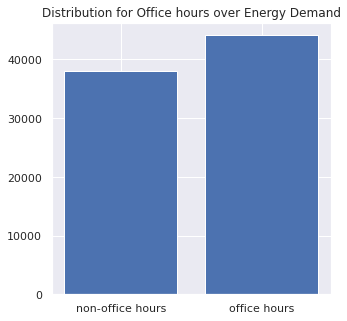

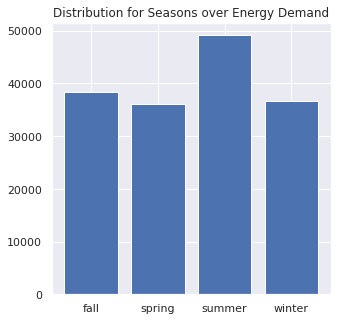

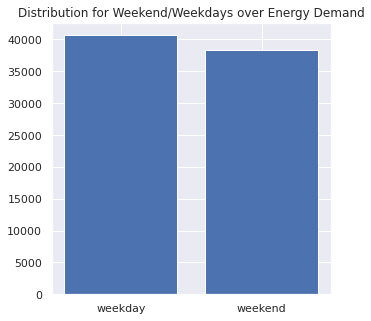

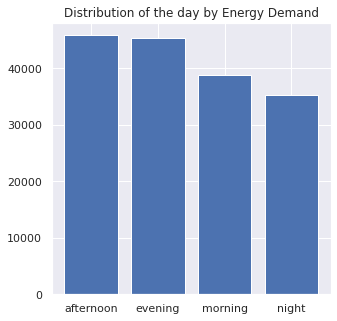

In [ ]:
#plt.subplots(2,2)
#fig, axs = plt.subplots(4)

#byOFH = pd.DataFrame(final.groupby('office_hours')['MWh'].mean())

#plt.figure(figsize=(5,5))
#plt.bar(byOFH.index, byOFH['MWh'])
#plt.title('Distribution for Office hours over Energy Demand')
#plt.xticks(byOFH.index)

#byS = pd.DataFrame(final.groupby('seasons')['MWh'].mean())

#plt.figure(figsize=(5,5))
#plt.bar(byS.index, byS['MWh'])
#plt.title('Distribution for Seasons over Energy Demand')
#plt.xticks(byS.index)

#byW = pd.DataFrame(final.groupby('weekend')['MWh'].mean())

#plt.figure(figsize=(5,5))
#plt.bar(byW.index, byW['MWh'])
#plt.title('Distribution for Weekend/Weekdays over Energy Demand')
#plt.xticks(byW.index)

#byD = pd.DataFrame(final.groupby('day_sections')['MWh'].mean())

#plt.figure(figsize=(5,5))
#plt.bar(byD.index, byD['MWh'])
#plt.title('Distribution of the day by Energy Demand')
#plt.xticks(byD.index)

#plt.show()

Here we observe a few trends which will help us better understand the data and help gain some insights into energy demand during various periods.

We can observe for figure-1 that during office hours there is a higher consumption of energy compared to non office hours.

For figure-2, we see that during the weekdays there is a higher consumtion of energy.

For figure-3, we observe that during afternoon and evening (2 and 3) there is higher energy demand followed by morning (1) and night (0).

For figure-4, we can observe that the most of amount of energy consumed is during the summer(1) which makes sense considering Texas has a higher temperature in the summer so the poulation would use more energy powering airconditioning systems.

### Trend of the target variable

In [ ]:
df=final
df.reset_index(inplace=True)
df['month'] = df['index'].apply(lambda time: time.month)

In [ ]:
#check the columns in the dataset
df.columns

Index(['index', 'tmpf', 'dwpf', 'relh', 'day', 'hour', 'seasons', 'weekend',
       'office_hours', 'day_sections', '3hr_rolling_tmpf', '6hr_rolling_tmpf',
       '12hr_rolling_tmpf', '24hr_rolling_tmpf', '48hr_rolling_tmpf',
       '3hr_rolling_dwpf', '6hr_rolling_dwpf', '12hr_rolling_dwpf',
       '24hr_rolling_dwpf', '48hr_rolling_dwpf', 'm_tmpf', 'm_tmpf2',
       'tmpf*dwpf', 'public_holiday', 'gyi_tmpf', 'gyi_dwpf', 'gyi_relh',
       'gyi_3hr_rolling_tmpf', 'gyi_6hr_rolling_tmpf', 'gyi_12hr_rolling_tmpf',
       'gyi_24hr_rolling_tmpf', 'gyi_48hr_rolling_tmpf',
       'gyi_3hr_rolling_dwpf', 'gyi_6hr_rolling_dwpf', 'gyi_12hr_rolling_dwpf',
       'gyi_24hr_rolling_dwpf', 'gyi_48hr_rolling_dwpf', 'gyi_m_tmpf',
       'gyi_m_tmpf2', 'gyi_tmpf*dwpf', 'labor force', 'MWh', 'month'],
      dtype='object')

In [ ]:
#dividing data for graphs， this is all columns we may use in the EDA
df1 = df[['seasons','month','tmpf','dwpf','relh','gyi_tmpf','gyi_dwpf','gyi_relh','labor force','MWh','index']]

In [ ]:
df2 = df1[['index','MWh']]
df2.rename(columns={'index':'Date'},inplace=True) # rename the column

In [ ]:
fig = px.scatter(
  df2, 
  x="Date",
  y="MWh",
  trendline='ols',
  title=f"Energy Consumption over the years"
  )
fig.show()

From the plot we can see that there are both trend and seasonal in the data. 

**Seasonal** - The energy consumption first drop down and then increase to the peak, then drop down again in winter. That make sence cause we always consump lot of power in summer. 

**Trend** - From the plot we can see that the energy consumption increases gradually over the years. The peak of each year increase from less than 70k to about 75k in 10 year span.

### The relationship between temperature & dew point with energy consumption

In [ ]:
df3 = df1[['MWh','tmpf','dwpf','relh']]

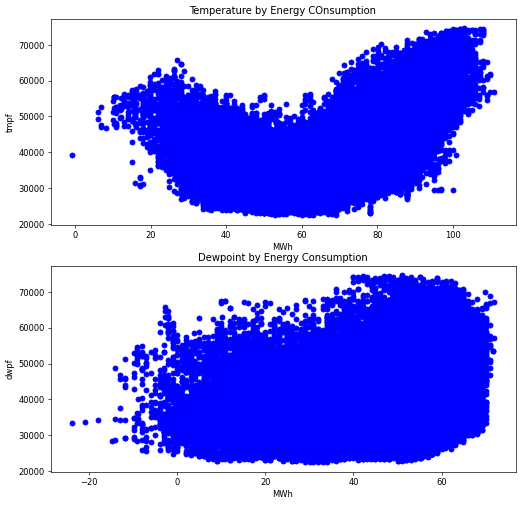

In [ ]:
figure, axes = plt.subplots(2, figsize=(10,10), dpi=60)
ax = axes.flatten()

axes[0].plot(df3['tmpf'],df3['MWh'], 'o', color='blue')
axes[0].set_xlabel('MWh')
axes[0].set_ylabel('tmpf')
axes[0].set_title('Temperature by Energy COnsumption')

axes[1].plot(df3['dwpf'],df3['MWh'], 'o', color='blue')
axes[1].set_xlabel('MWh')
axes[1].set_ylabel('dwpf')
axes[1].set_title('Dewpoint by Energy Consumption')

plt.show()

From the plot we can see that 'tmpf' first decrease then increase while the MWh increase. That means these two varibale have a strong relationship. For the 'dwpf' we can't see any obvious relationship because data presented in discrete segments. For the 'relh' we can see the it slightly decrease while the MWh increase. They may have a weak relationship. Base on these analysis we can know that we can use these data to build the model because these data seems do affecting the target variable 'MWh'.

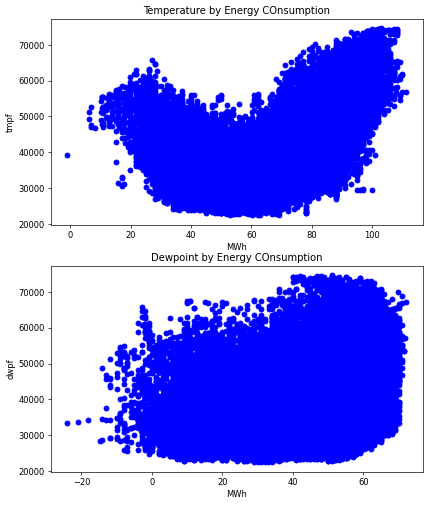

In [ ]:
df4 = df1[['MWh','gyi_tmpf','gyi_dwpf','gyi_relh']]

figure, axes = plt.subplots(2, figsize=(8,10), dpi=60)
ax = axes.flatten()

axes[0].plot(df3['tmpf'],df3['MWh'], 'o', color='blue')
axes[0].set_xlabel('MWh')
axes[0].set_ylabel('tmpf')
axes[0].set_title('Temperature by Energy COnsumption')

axes[1].plot(df3['dwpf'],df3['MWh'], 'o', color='blue')
axes[1].set_xlabel('MWh')
axes[1].set_ylabel('dwpf')
axes[1].set_title('Dewpoint by Energy COnsumption')

plt.show()

These are the same analysis for the extra weather data. What is special here is that we find a outlier. We can see that there is a point far from the other points in the tmpf plot. It might be a error or a sepcial day. We can collect further information to figure it out when we need. Again, from the plot we can see that 'tmpf' and 'dwpf' first decrease then increase while the MWh increase. That means these two varibale have a strong relationship.For the 'relh' we can see the it slightly decrease while the MWh increase. They may have a weak relationship. Base on these analysis we can know that we can use these data to build the model because these data seems do affecting the target variable 'MWh'.

### Boxplot group by seasons

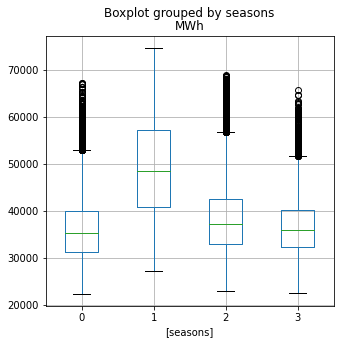

In [ ]:
final.boxplot(column=['MWh'], by=['seasons'], figsize=(5,5))
plt.show()

**For the x label**

**Spring = 0, Summer = 1, Fall = 2, and Winter = 3**

From the boxplot grouped by seasons, we can see the median of season 0(Spring) is about 35,000, season 1(Summer) is about 48,000, season 2(Fall) is about 36,000, and season 3(Winter) is 35,000. There is an increase in season 1(Summer) and then decreasing in season 2(Fall). Therefore, it is useful to focus on why  the MWh has a significant upward trend. <br>
MWh have many outliers in season 0(Spring), season 2(Fall), and season 3(Winter), but season 1(Summer) does not have outliers, maybe depending on our bifurcation of year into seasons. Also season 1(Summer) has the biggest range from Q1 to Q3 - 40,500 to 58,000. 

## Tables

### Months that have higher energy consumption

In [ ]:
tb1 = final
tb2 = tb1.groupby('month')['MWh'].mean()
tb2 = pd.DataFrame(tb2)
tb2.sort_values('MWh', ascending=False)

MWh
month              
8      50600.618149
7      49841.762668
6      46835.919069
9      44615.430652
5      39605.988118
10     37601.896553
1      37318.435919
12     36962.108155
2      35837.854149
4      34919.185631
11     34689.884302
3      33835.280107

**From this table we can see that the energy consumption is highest in months 6 to 9 which is August to November. We can do further analysis in the future and find out the reason. This can tell the company when to increase power supply and capacity.**

### Correlation between temperature, dewpoint, labor force and target variable

In [ ]:
tb2 = final
tb2 = tb2[['tmpf','dwpf','labor force','MWh']]
corr = tb2.corr()
corr

tmpf      dwpf  labor force       MWh
tmpf         1.000000  0.504912     0.006498  0.553316
dwpf         0.504912  1.000000     0.144420  0.342942
labor force  0.006498  0.144420     1.000000  0.256733
MWh          0.553316  0.342942     0.256733  1.000000

**We can observe from the correlation table that there is an interaction between our target variable MWh (energy consumed) and our input variables such as labor force (from additonal dataset), tmpf and dwpf. We observe a high correaltion between MWh with tmpf, followed by dwpf and labor force.**

**Hence we can say that these input varibales would be very helpful in predicting the energy consumption and could be used in modeling.**

# Train & Test Partitioning


In [ ]:
# # split the data into train and test partitions
# # we will use the data from 2011 till end of 2019 for train, and 2020 for test

train = final.loc['2011-01-01 00:00:00':'2019-12-31 23:00:00']

test = final.loc['2020-01-01 00:00:00':'2020-12-31 23:00:00']

In [ ]:
print('train min',train.index.min())
print('train max',train.index.max())
print('test min',test.index.min())
print('test max',test.index.max())

train min 2011-01-02 23:00:00
train max 2019-12-31 23:00:00
test min 2020-01-01 00:00:00
test max 2020-12-31 23:00:00


In [ ]:
final.columns

Index(['tmpf', 'dwpf', 'relh', 'day', 'hour', 'seasons', 'weekend',
       'office_hours', 'day_sections', '3hr_rolling_tmpf', '6hr_rolling_tmpf',
       '12hr_rolling_tmpf', '24hr_rolling_tmpf', '48hr_rolling_tmpf',
       '3hr_rolling_dwpf', '6hr_rolling_dwpf', '12hr_rolling_dwpf',
       '24hr_rolling_dwpf', '48hr_rolling_dwpf', 'm_tmpf', 'm_tmpf2',
       'tmpf*dwpf', 'public_holiday', 'gyi_tmpf', 'gyi_dwpf', 'gyi_relh',
       'gyi_3hr_rolling_tmpf', 'gyi_6hr_rolling_tmpf', 'gyi_12hr_rolling_tmpf',
       'gyi_24hr_rolling_tmpf', 'gyi_48hr_rolling_tmpf',
       'gyi_3hr_rolling_dwpf', 'gyi_6hr_rolling_dwpf', 'gyi_12hr_rolling_dwpf',
       'gyi_24hr_rolling_dwpf', 'gyi_48hr_rolling_dwpf', 'gyi_m_tmpf',
       'gyi_m_tmpf2', 'gyi_tmpf*dwpf', 'labor force', 'MWh'],
      dtype='object')

## Scaling using StandardScaler
*for continuous columns*

In [ ]:
from sklearn.preprocessing import StandardScaler

# make a copy of dataframe
scaled_features_train = train.copy()

col_names = ['tmpf', 'dwpf', 'relh','3hr_rolling_tmpf', '6hr_rolling_tmpf','12hr_rolling_tmpf', '24hr_rolling_tmpf', '48hr_rolling_tmpf',
             '3hr_rolling_dwpf', '6hr_rolling_dwpf', '12hr_rolling_dwpf', '24hr_rolling_dwpf', '48hr_rolling_dwpf', 'm_tmpf', 'm_tmpf2',
             'tmpf*dwpf', 'gyi_tmpf', 'gyi_dwpf', 'gyi_relh', 'gyi_3hr_rolling_tmpf', 'gyi_6hr_rolling_tmpf', 'gyi_12hr_rolling_tmpf',
             'gyi_24hr_rolling_tmpf', 'gyi_48hr_rolling_tmpf', 'gyi_3hr_rolling_dwpf', 'gyi_6hr_rolling_dwpf', 'gyi_12hr_rolling_dwpf',
             'gyi_24hr_rolling_dwpf', 'gyi_48hr_rolling_dwpf', 'gyi_m_tmpf', 'gyi_m_tmpf2', 'gyi_tmpf*dwpf', 'labor force']

features = scaled_features_train[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler()
features = scaler.fit_transform(features.values)

scaled_features_train[col_names] = features

In [ ]:
train = scaled_features_train
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78840 entries, 2011-01-02 23:00:00 to 2019-12-31 23:00:00
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tmpf                   78840 non-null  float64
 1   dwpf                   78840 non-null  float64
 2   relh                   78840 non-null  float64
 3   day                    78840 non-null  int64  
 4   hour                   78840 non-null  int64  
 5   seasons                78840 non-null  int64  
 6   weekend                78840 non-null  int64  
 7   office_hours           78840 non-null  int64  
 8   day_sections           78840 non-null  int64  
 9   3hr_rolling_tmpf       78840 non-null  float64
 10  6hr_rolling_tmpf       78840 non-null  float64
 11  12hr_rolling_tmpf      78840 non-null  float64
 12  24hr_rolling_tmpf      78840 non-null  float64
 13  48hr_rolling_tmpf      78840 non-null  float64
 14  3hr_rolling_dwpf   

In [ ]:
# Applying the scaler using transform on the test data
# make a copy of dataframe
scaled_features_test = test.copy()

col_names = ['tmpf', 'dwpf', 'relh','3hr_rolling_tmpf', '6hr_rolling_tmpf','12hr_rolling_tmpf', '24hr_rolling_tmpf', '48hr_rolling_tmpf',
             '3hr_rolling_dwpf', '6hr_rolling_dwpf', '12hr_rolling_dwpf', '24hr_rolling_dwpf', '48hr_rolling_dwpf', 'm_tmpf', 'm_tmpf2',
             'tmpf*dwpf', 'gyi_tmpf', 'gyi_dwpf', 'gyi_relh', 'gyi_3hr_rolling_tmpf', 'gyi_6hr_rolling_tmpf', 'gyi_12hr_rolling_tmpf',
             'gyi_24hr_rolling_tmpf', 'gyi_48hr_rolling_tmpf', 'gyi_3hr_rolling_dwpf', 'gyi_6hr_rolling_dwpf', 'gyi_12hr_rolling_dwpf',
             'gyi_24hr_rolling_dwpf', 'gyi_48hr_rolling_dwpf', 'gyi_m_tmpf', 'gyi_m_tmpf2', 'gyi_tmpf*dwpf', 'labor force']

features = scaled_features_test[col_names]

features = scaler.transform(features.values)

scaled_features_test[col_names] = features

In [ ]:
test = scaled_features_test
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2020-01-01 00:00:00 to 2020-12-31 23:00:00
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tmpf                   8784 non-null   float64
 1   dwpf                   8784 non-null   float64
 2   relh                   8784 non-null   float64
 3   day                    8784 non-null   int64  
 4   hour                   8784 non-null   int64  
 5   seasons                8784 non-null   int64  
 6   weekend                8784 non-null   int64  
 7   office_hours           8784 non-null   int64  
 8   day_sections           8784 non-null   int64  
 9   3hr_rolling_tmpf       8784 non-null   float64
 10  6hr_rolling_tmpf       8784 non-null   float64
 11  12hr_rolling_tmpf      8784 non-null   float64
 12  24hr_rolling_tmpf      8784 non-null   float64
 13  48hr_rolling_tmpf      8784 non-null   float64
 14  3hr_rolling_dwpf    

In [ ]:
# prep data for modeling (multivariate)
# link: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

from numpy import array

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in np.arange(len(sequences)): # be careful of this line!
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# our lookback period is 24hrs = 1 day
n_steps = 24
raw_seq = np.array(train) #make sure data is stored as a numpy array!

X_train, y_train = split_sequences(raw_seq, n_steps)

In [ ]:
# check the shapes
print(X_train.shape)
print(y_train.shape)

(78817, 24, 40)
(78817,)


In [ ]:
# n_steps = our lookback period is 48hrs = 2 days
n_steps = 24
raw_seq = np.array(test) #make sure data is stored as a numpy array!

X_test, y_test = split_sequences(raw_seq, n_steps)

In [ ]:
# take a peak at what it did
print(X_test.shape)
print(y_test.shape)

# scroll up and make sure you understand this!
# y is a function of X (the previous n_steps observations!)

(8761, 24, 40)
(8761,)


In [ ]:
# check the shape to be sure
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(78817, 24, 40) (8761, 24, 40)
(78817,) (8761,)


In [ ]:
n_steps = X_train.shape[1]
n_features = X_train.shape[2]

print(n_steps, n_features)

24 41


# 6. Modeling
*(Lookback of 24hrs = 1 day)*

In [ ]:
# define
n_steps = X_train.shape[1]
n_features = X_train.shape[2]

# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, input_shape=(n_steps,n_features)))
model.add(MaxPooling1D(2))
model.add(GRU(60, activation='relu', recurrent_dropout=0.2, return_sequences=True))
model.add(SimpleRNN(30, activation='relu', return_sequences=True))
model.add(GRU(60, activation='relu', return_sequences=True))
model.add(GRU(60, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=20, 
                   verbose=1,
                   restore_best_weights=True)

# fit model (uses early stopping)
history = model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=10, 
          validation_split=0.2,
          verbose=1,
          callbacks=[es],
          shuffle=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 22, 32)            3872      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 11, 32)           0         
 1D)                                                             
                                                                 
 gru_3 (GRU)                 (None, 11, 60)            16920     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 11, 30)            2730      
                                                                 
 gru_4 (GRU)                 (None, 11, 60)            16560     
                                                                 
 gru_5 (GRU)                 (None, 60)                21960     
                                                      

In [ ]:
#Save the model
# model.save('/content/drive/Shareddrives/Deep Learning/Project 2 - RNN/model1')

INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Deep Learning/Project 2 - RNN/model1/assets


## Learning Curve

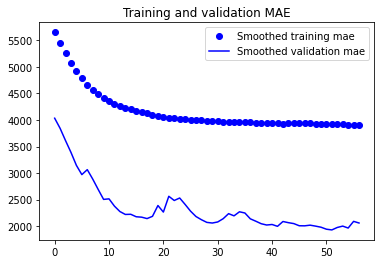

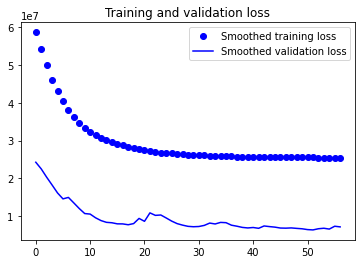

In [ ]:
import matplotlib.pyplot as plt

mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mae))

def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(mae), 'bo', label='Smoothed training mae')
plt.plot(epochs,
         smooth_curve(val_mae), 'b', label='Smoothed validation mae')
plt.title('Training and validation MAE')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

We see that the learning curve for the Loss and MAE values for Validation is somewhat smooth with some unexpected highs for some batches. It means the modela hs learned slowly and properly.

In [ ]:
# Load the model
# from tensorflow import keras
# model=keras.models.load_model('/content/drive/Shareddrives/Deep Learning/Data/Project 2 - RNN/model1')

# Results

## Scatter Plots of actual vs. predicted for train

MAE:  1714.397049688299
MAPE:  0.043078670219779285


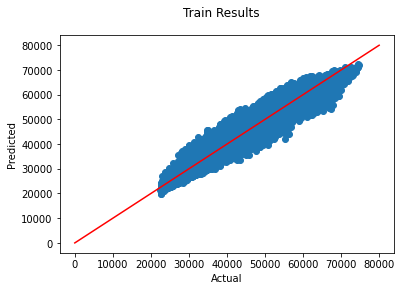

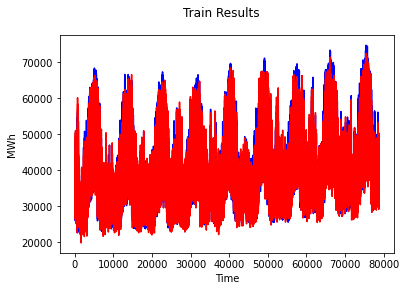

In [ ]:
# make a prediction
pred = model.predict(X_train)# the pred

# calculate MSE for the baseline model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
print('MAE: ', mean_absolute_error(y_train, pred))
print('MAPE: ', mean_absolute_percentage_error(y_train, pred))

actual = y_train # the actual
plt.scatter(x=actual, y=pred)
x = np.linspace(0,80000) # 45 degree line from 0 to 25 (axes are the same)
plt.plot(x, x, color='red')
plt.suptitle('Train Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# show timeseries plot on the train and validation data
plt.plot(np.arange(X_train.shape[0]), y_train, color='blue') # actual data
plt.plot(np.arange(X_train.shape[0]), pred, color='red') # predicted data
plt.suptitle('Train Results')
plt.xlabel('Time')
plt.ylabel('MWh')
plt.show()

The model works well overall except that it does not predict some of the peak energy demands so well. The model also does not seem to overfit as seen from the scatter plot, almost equal number of point sappear on either sides of the red line.

## Scatter Plots of actual vs. predicted for test

MAE:  1754.2600100675293
MAPE:  0.04051476874407289


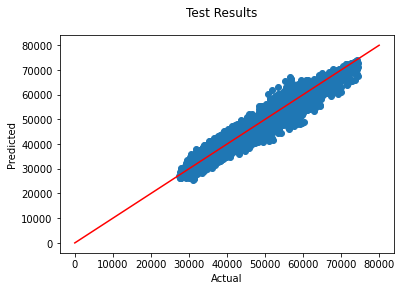

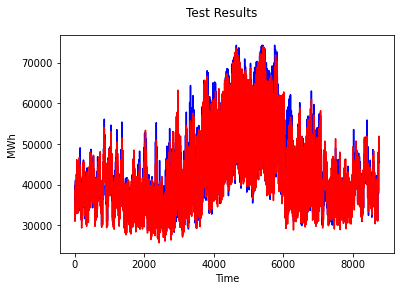

In [ ]:
# # make a prediction
pred = model.predict(X_test)# the pred

# calculate MSE for the baseline model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
print('MAE: ', mean_absolute_error(y_test, pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, pred))

actual = y_test # the actual
plt.scatter(x=actual, y=pred)
x = np.linspace(0,80000) # 45 degree line from 0 to 80000
plt.plot(x, x, color='red')
plt.suptitle('Test Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# show timeseries plot on the train and validation data
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.suptitle('Test Results')
plt.xlabel('Time')
plt.ylabel('MWh')
plt.show()

The model works well overall except that it fall behind on predicting some of the peak energy demands. The model also does not seem to overfit as seen from the scatter plot, almost equal number of point sappear on either sides of the red line.

# 7. Analysis

In [ ]:
# from tensorflow import keras
# model=keras.models.load_model('/content/drive/Shareddrives/Deep Learning/Project 2 - RNN/model1')

In [ ]:
y_actual = pd.DataFrame(test.loc['2020-01-01 23:00:00':'2020-12-31 23:00:00', ['MWh', 'day', 'hour']])

In [ ]:
y_pred = pd.DataFrame(model.predict(X_test))
y_pred.columns = ['MWh_pred']
y_pred.set_index(y_actual.index, inplace=True, drop=True)
print(y_pred.shape)

(8761, 1)


In [ ]:
compare = pd.concat([y_actual, y_pred], axis=1)
compare['error'] = compare['MWh'] - compare['MWh_pred']
compare['absolute_error'] = abs(compare['MWh'] - compare['MWh_pred'])

compare['Date'] = compare.index
compare['month'] = compare['Date'].apply(lambda time: time.month)
compare['weekday'] = compare['Date'].apply(lambda time: time.weekday())

compare.head()

## Distribution of errors & absolute errors by Month



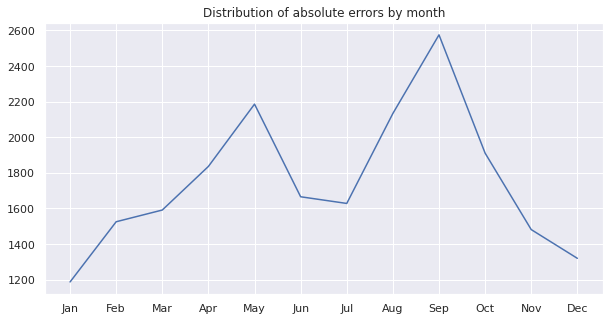

In [ ]:
by_month = pd.DataFrame(compare.groupby('month')['absolute_error'].mean())

plt.figure(figsize=(10,5))
plt.plot(by_month['absolute_error'])
plt.title('Distribution of absolute errors by month')
label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(by_month.index, labels = label)
plt.show()

**We see that the absolute errors are higher and have peaks for the months of May and September. The model does not perform well on predicting summer and fall peak values.**

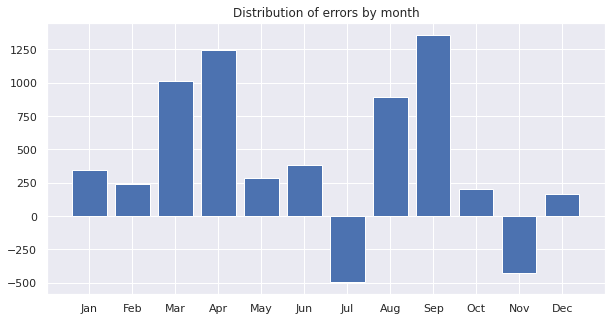

In [ ]:
by_month = pd.DataFrame(compare.groupby('month')['error'].mean())

plt.figure(figsize=(10,5))
plt.bar(by_month.index, by_month['error'])
plt.title('Distribution of errors by month')
label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(by_month.index, labels = label)
plt.show()

**Again for the errors we see that the model overpredicts a lot for the months of March, April, August & September while underpredicts for the months of July and November**

## Distribution of errors & absolute errors by Day of the Week

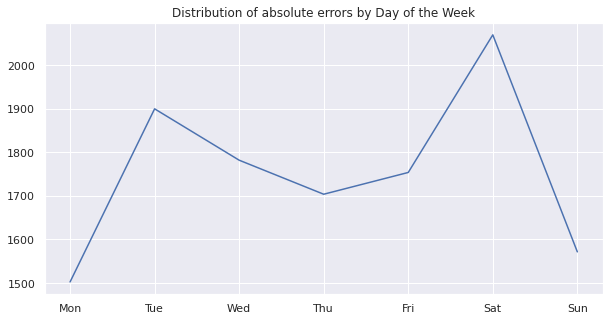

In [ ]:
by_weekday = pd.DataFrame(compare.groupby('weekday')['absolute_error'].mean())

# Distribution of Mean Absolute Error by Day of the Week
plt.figure(figsize=(10,5))
plt.plot(by_weekday['absolute_error'])
plt.title('Distribution of absolute errors by Day of the Week')
label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(by_weekday.index, labels = label)
plt.show()

**We see that the absolute errors are higher and have peaks for the days - Tuesday and Saturday and does not perform well on predicting energy demand for these days**

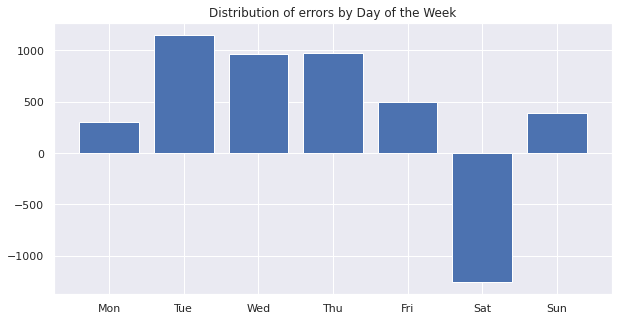

In [ ]:
by_weekday = pd.DataFrame(compare.groupby('weekday')['error'].mean())

# Distribution of Error by Day of the Week
plt.figure(figsize=(10,5))
plt.bar(by_weekday.index, by_weekday['error'])
plt.title('Distribution of errors by Day of the Week')
label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(by_weekday.index, labels = label)
plt.show()

**Again for the errors we see that the model overpredicts a lot for the days -  Tueday through Thursday while severly underpredicts for Saturday. Maybe we can try splitting the weekend variable into Saturday and Sunday to be used in the model**

## Distribution of errors & absolute errors by Hour of the Day

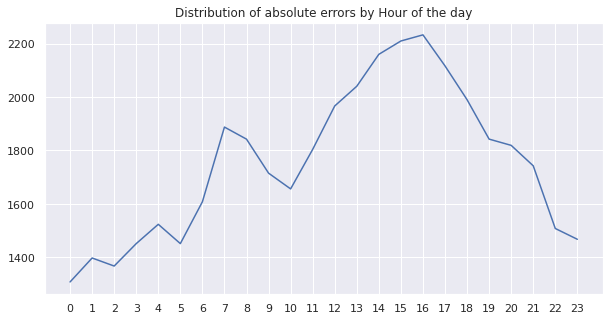

In [ ]:
by_hour = pd.DataFrame(compare.groupby('hour')['absolute_error'].mean())

plt.figure(figsize=(10,5))
plt.plot(by_hour['absolute_error'])
plt.title('Distribution of absolute errors by Hour of the day')
plt.xticks(np.arange(0, 24, 1))
plt.show()

**We see that the absolute errors are higher and have peaks for the days - Tuesday and Saturday and does not perform well on predicting energy demand for these days**

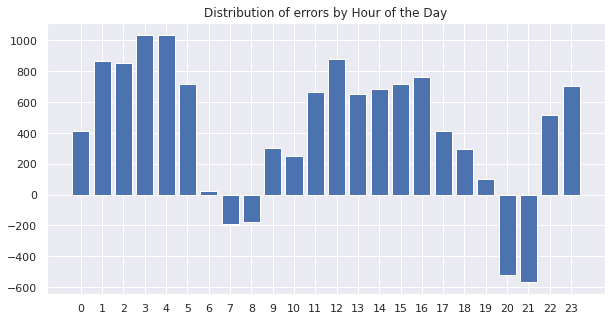

In [ ]:
by_hour = pd.DataFrame(compare.groupby('hour')['error'].mean())

plt.figure(figsize=(10,5))
plt.bar(by_hour.index, by_hour['error'])
plt.title('Distribution of errors by Hour of the Day')
plt.xticks(np.arange(0, 24, 1))
plt.show()

# Conclusion

1.   We tried three different model architectures and the one present in the file as seen above gave us the best results of all with:
> **MAE = 1754.26 and MAPE = 4.05%**

2.   The model that worked the best had the following architecture:
>* Conv1D - (filters=32, kernel_size=3)
>* MaxPooling1D - pool_size = 2
>* GRU with 60 nodes & recurrent dropout=0.2
>* SimpleRNN with 30 nodes
>* GRU with 60 nodes
>* GRU with 60 nodes
>* Drop out layer - 0.3 to turn off some nodes to prevent model overfitting
>* Dense (1)

3.   The best model had n_steps or lookback of 24. We experimented with various lookbacks like 12hrs, 48hrs and found 24 to work the best.

4. As for other architectures, we tried using more GRU layers and also Bidirectional GRU but due to the number of parameters it took longer runtime and still had similar results. And hence, considering the law of parsimony we found that our best model was one with the least trainable parameters but yet giving the best results.

5. We also implemented models using LSTM but they failed to capture the volatlity or peak energy demands and thus the MAE was much higher for these models.

6. Interaction variables like month multiplied by squared value of temerature and temperature multiplied by dewpoint were key factors in helping the model predict the peak demands. As were the indicator variables like office hours, sections of the day. Labor force was useful in understanding the trend.

7. Weather data for another city in Texas (Sherman) which lies more towards the north was helpful in generalising the temperature variation in overall Texas since it is a huge state and taking temperature of one city as a proxy for the entire state wouldn't be very accurate.

8. We also tried including Gross Domestic Product (GDP) for the state of Texas but since we could only find yearly data, the results were not that great and hence have not included in the final analysis.

9. Our model performed great on forecasting energy demands for 2020 and can definitely be used for future predictions especially since energy consumption is very much dependent on weather. It can predict peak demands and necessary actions can be taken into account in order to avoid shortage of energy.